In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('DatasetB.csv')

In [53]:
df.head()

,Age,Cust_segment,Gender,Customer_status,Customer_year,Sale
0,36.0,High,F,Active,21.0,60572.71875
1,39.0,High,M,Active,7.0,48472.63965
2,12.0,High,M,Active,13.0,18696.27930
3,32.0,High,F,Active,4.0,29870.82910
4,21.0,High,F,Active,8.0,23238.52930


Data cleaning&Data exploration

In [54]:
df.duplicated().sum()

0

In [55]:
df.isna().sum()

Age                40
Cust_segment        0
Gender              0
Customer_status    66
Customer_year      60
Sale                0
dtype: int64

In [56]:
df.isnull().sum() / df.shape[0] * 100.00

Age                0.088889
Cust_segment       0.000000
Gender             0.000000
Customer_status    0.146667
Customer_year      0.133333
Sale               0.000000
dtype: float64

In [57]:
df.dtypes

Age                float64
Cust_segment        object
Gender              object
Customer_status     object
Customer_year      float64
Sale               float64
dtype: object

In [58]:
cat_feats = df.select_dtypes('object').columns.to_list()
num_feats = df.select_dtypes('float64').columns.to_list()

In [59]:
for i in num_feats:
    print(i,':', df[i].unique())

Age : [ 36.  39.  12.  32.  21.  54.  38.  26.  28.  33.  24.  25.  19.  37.
  23.  14.  27.  59.  41.  46.  34.  55.  42.  30.  31.  56.  67.  48.
  22.  29.  35.  47.  40.  43.  49.  52.  20.  77.  69.  74.  11.  61.
  44.  15.  68.  18.  13.  51.  63.  50.  64.  62.  66.  45.  53.  16.
  65.  58.  60.  57.  71.  17.  79.  nan  73.  72.  76.  89.  86.  70.
  78.  82. 999.  75.  83.  84.  87.  80.  81.  88.  85.  92.]
Customer_year : [21.  7. 13.  4.  8. 17. 20. 14. 16.  5.  9. 10.  2. 15.  6. 11. 22.  3.
 19. 12.  1. 18. 24. 23. nan -1.]
Sale : [60572.71875 48472.63965 18696.2793  ... 52909.89807 33109.32016
 63224.57172]


In [60]:
for i in cat_feats:
    print(i,':',df[i].unique())

Cust_segment : ['High' 'Low']
Gender : ['F' 'M' 'Male' 'Female' 'f' 'm' 'MM' 'ff' 'FF']
Customer_status : ['Active' 'Inactive' nan]


In [61]:
df['Age'] =df['Age'].replace(999.0,np.nan)
df['Customer_year'] =df['Customer_year'].replace(-1.0,np.nan)

Text(0.5, 0, 'Age (years)')

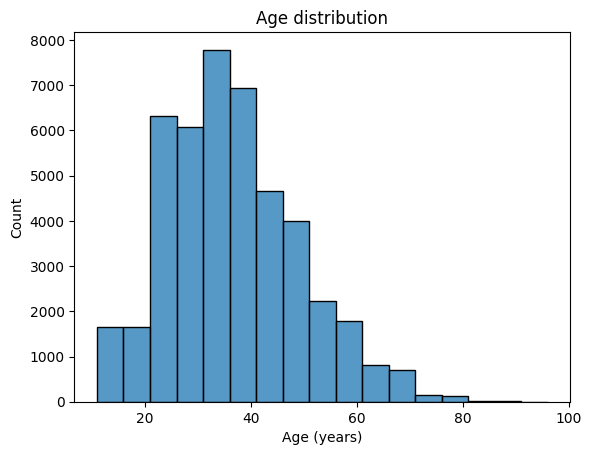

In [62]:
sns.histplot(data=df, x ='Age', binwidth=5)
plt.title('Age distribution')
plt.xlabel('Age (years)')

Text(0.5, 0, 'Customer_year (years)')

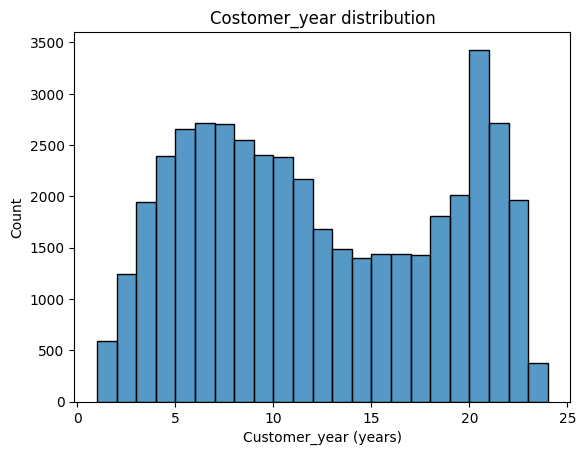

In [63]:
sns.histplot(data=df,x = 'Customer_year', binwidth=1)
plt.title('Costomer_year distribution')
plt.xlabel('Customer_year (years)')

Text(0.5, 0, 'Sale (Baht)')

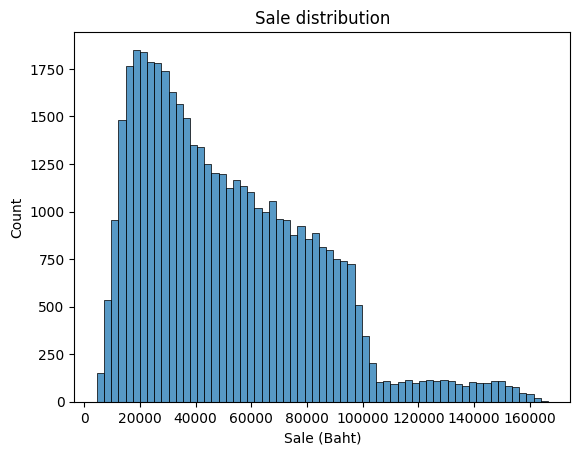

In [64]:
sns.histplot(data=df,x = 'Sale')
plt.title('Sale distribution')
plt.xlabel('Sale (Baht)')

In [65]:
num_feats

['Age', 'Customer_year', 'Sale']

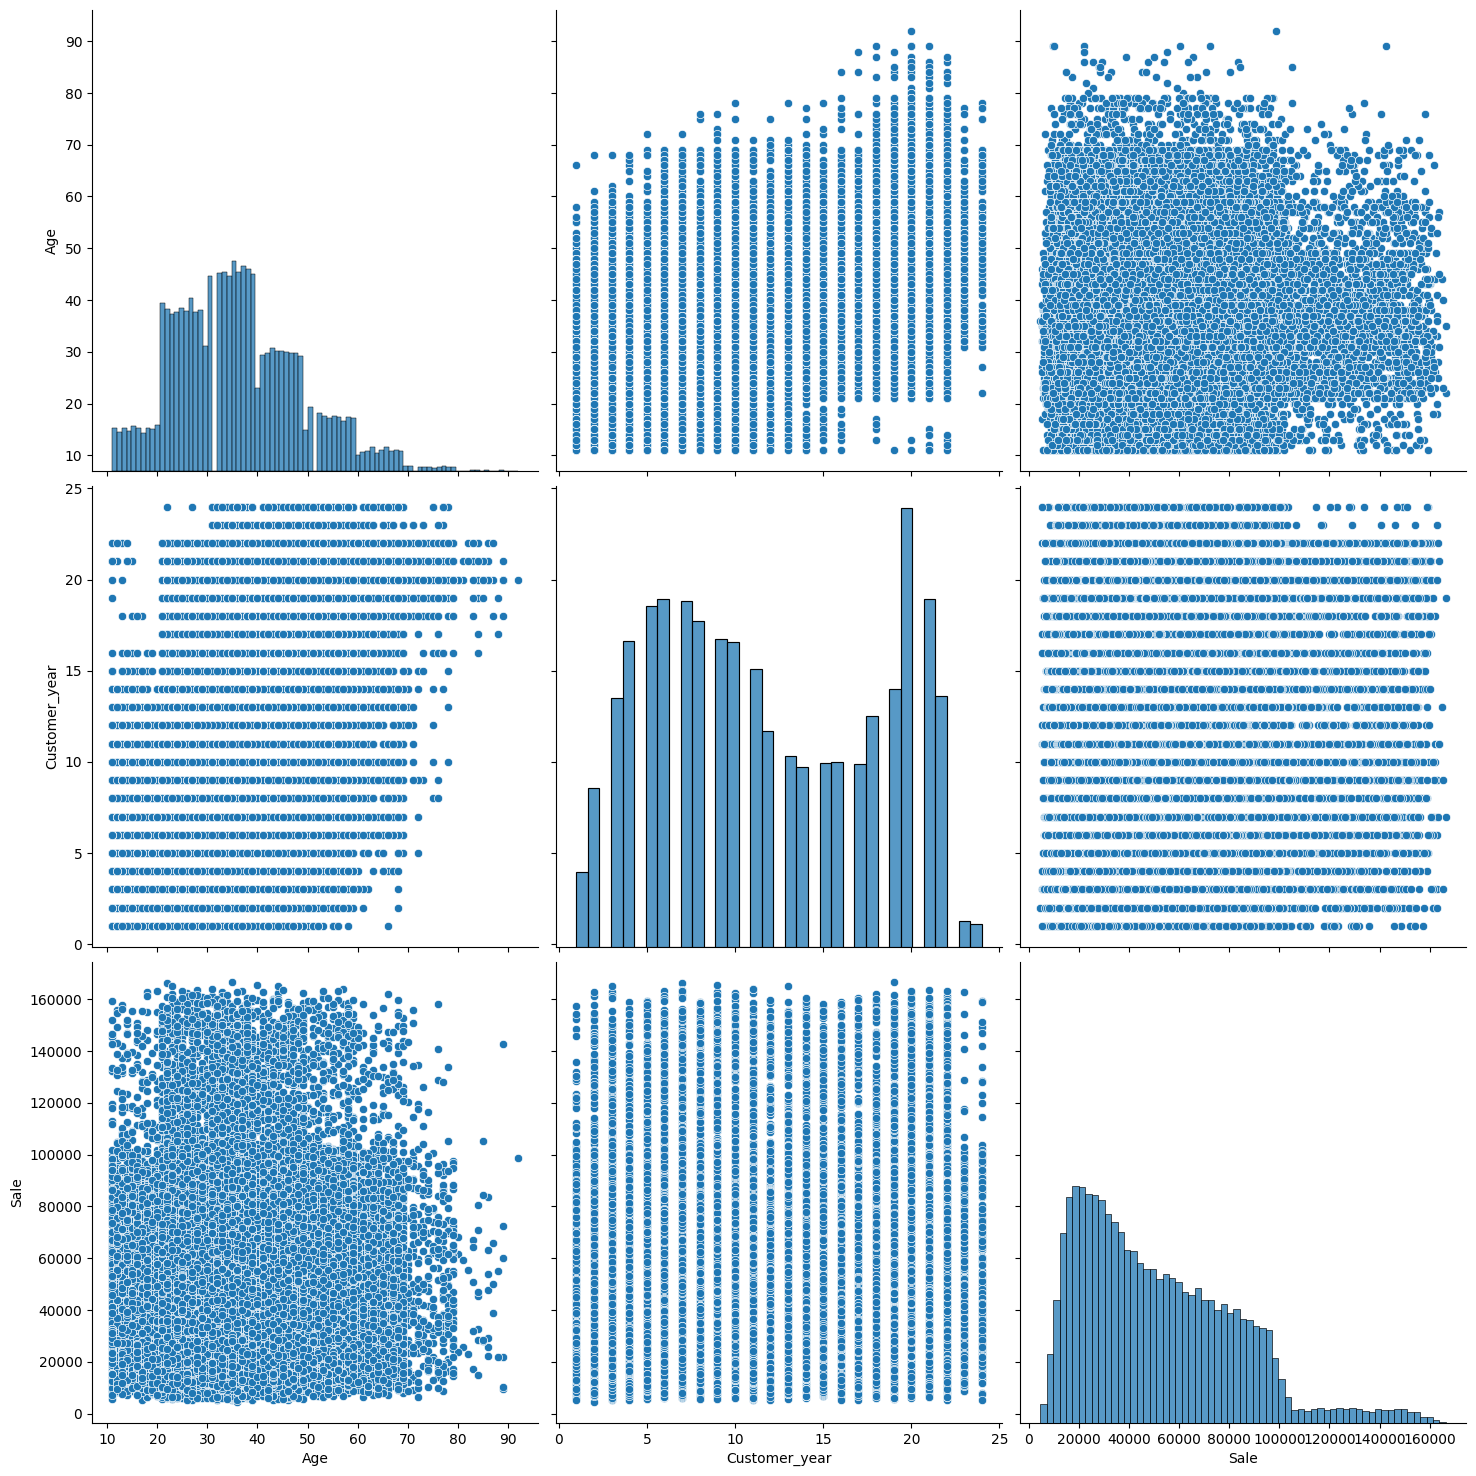

In [66]:
sns.pairplot(df[num_feats],height=5)

/var/folders/by/0rz3gnw148l6ch25mwf10xjc0000gn/T/ipykernel_50970/1044640390.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='magma')


<Axes: >

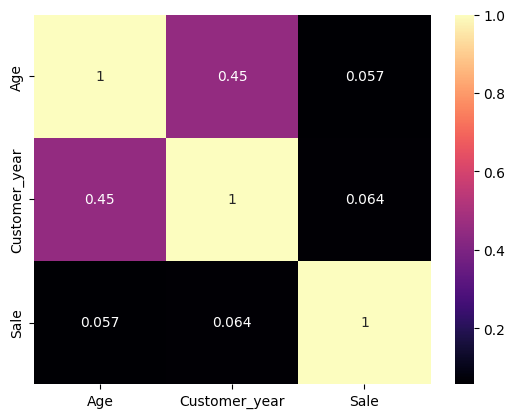

In [67]:
sns.heatmap(df.corr(), annot=True, cmap='magma')

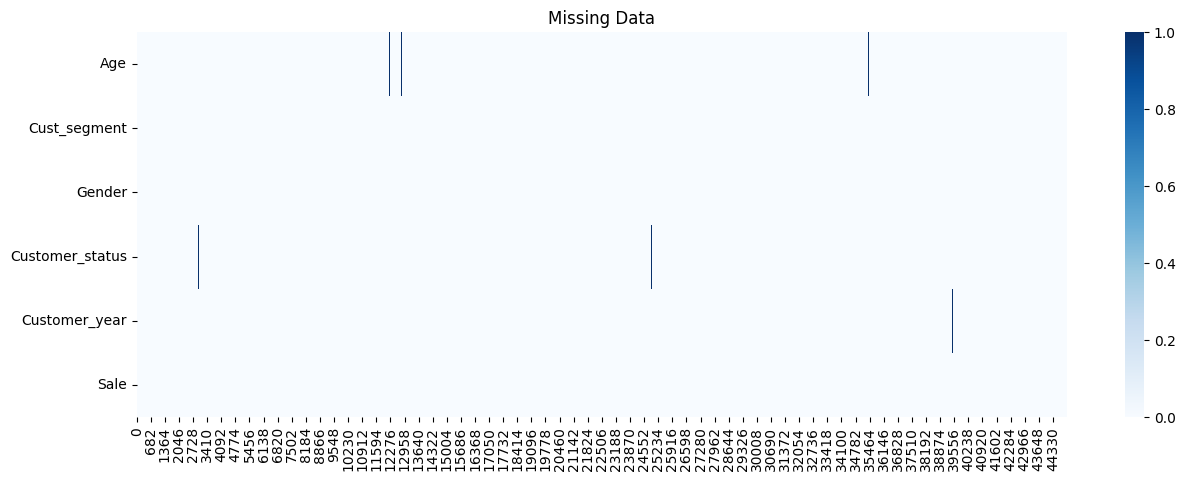

In [68]:
plt.subplots(figsize=(15,5))  
sns.heatmap(df.isnull().transpose(), cmap = 'Blues')
plt.title("Missing Data")
plt.show()

In [69]:
df['Gender'] = df['Gender'].replace(['Female','f','ff','FF'],'F')
df['Gender'] = df['Gender'].replace(['Male','m','MM'],'M')

In [70]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

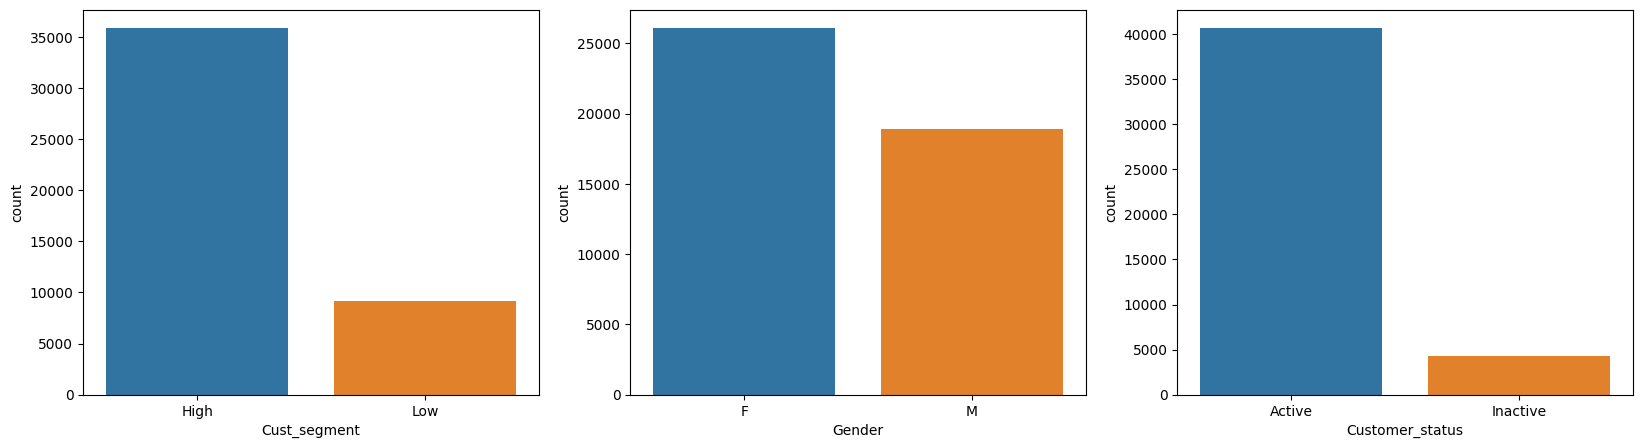

In [71]:
col = 1
plt.figure(figsize = (20, 5))
for i in cat_feats:
    plt.subplot(1, 3, col)
    sns.countplot(data=df, x=i)
    plt.xlabel(i)
    col = col + 1

In [120]:
num_feats

['Age', 'Customer_year', 'Sale']

In [121]:
cat_feats

['Cust_segment', 'Gender', 'Customer_status']

In [138]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, PowerTransformer

data = df.copy()

# Apply log transform to feature1 and feature2, and power transform to feature3
data[['Age','Sale']] = np.log(data[['Age','Sale']])
pt = PowerTransformer()
data['Customer_year'] = pt.fit_transform(data['Customer_year'].values.reshape(-1, 1))

# Apply label encoding to categorical features
le_dict = {}
for cat_feature in cat_feats:
    le_dict[cat_feature] = LabelEncoder()
    data[cat_feature] = data[cat_feature].fillna(value='missing')
    data[cat_feature] = le_dict[cat_feature].fit_transform(data[cat_feature])

# Impute missing values using KNNImputer
imputer = KNNImputer()
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Inverse label encoding for categorical features
#for cat_feature in cat_feats:
    #data_imputed[cat_feature] = le_dict[cat_feature].inverse_transform(data_imputed[cat_feature].astype(int))

# Convert numeric features back to their original scale
#data_imputed[['Age','Sale']] = np.exp(data_imputed[['Age','Sale']])
#data_imputed['Customer_year'] = pt.inverse_transform(data_imputed['Customer_year'].values.reshape(-1, 1))

# Ensure output is a pandas DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)


In [131]:
data_imputed.isna().sum()

Age                0
Cust_segment       0
Gender             0
Customer_status    0
Customer_year      0
Sale               0
dtype: int64

In [146]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Ensure output is a pandas DataFrame
train_df_imputed = pd.DataFrame(data_imputed, columns=data_imputed.columns)

# Split the data into features and target variable
X = train_df_imputed.drop(columns=['Sale'])
y = train_df_imputed['Sale']


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the different regression models
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

# Define a list of regression models to test
models = models = {'Linear Regression': lr, 'Ridge': ridge, 'Lasso': lasso, 'Random Forest': rf, 'Gradient Boosting': gb}

# Define a dictionary to store the cross-validation scores for each model
scores = {}

# Loop over the models and compute the cross-validation score for each
for name, model in models.items():
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    scores[name] = -score.mean()
    print(f'{name} Cross-validation Scores: {score}')
    print(f'{name} Average Cross-validation Score: {-score.mean()}')

# Find the best model based on the validation score
best_model_name = min(scores, key=scores.get)
best_model = models[best_model_name]
print('Best Model:', best_model_name)

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Check for overfitting by comparing training and validation scores
train_score = mean_squared_error(y_train, best_model.predict(X_train), squared=False)
val_score = mean_squared_error(y_val, best_model.predict(X_val), squared=False)
print('Training RMSE:', train_score)
print('Validation RMSE:', val_score)
if train_score < val_score:
    print('The model is overfitting to the training data')
else:
    print('The model is not overfitting')

# Use the fitted model to make predictions on new data
y_new = best_model.predict(X_val)


Linear Regression Cross-validation Scores: [-0.4338605  -0.43162771 -0.42344485 -0.4269735  -0.41326584]
Linear Regression Average Cross-validation Score: 0.42583448076188934
Ridge Cross-validation Scores: [-0.43386124 -0.43162663 -0.42344457 -0.42697326 -0.41326644]
Ridge Average Cross-validation Score: 0.4258344303938947
Lasso Cross-validation Scores: [-0.44421513 -0.43837745 -0.43039079 -0.43448252 -0.42200008]
Lasso Average Cross-validation Score: 0.4338931947805492
Random Forest Cross-validation Scores: [-0.49532743 -0.49374202 -0.48702423 -0.49383052 -0.47297251]
Random Forest Average Cross-validation Score: 0.488579343988624
Gradient Boosting Cross-validation Scores: [-0.43359665 -0.43178559 -0.42400564 -0.42646593 -0.41303871]
Gradient Boosting Average Cross-validation Score: 0.4257785052280837
Best Model: Gradient Boosting
Training RMSE: 0.649493344398982
Validation RMSE: 0.6466430476752868
The model is not overfitting
